In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Correlation between the concentration of multiple pollutants and lung cancer. We

In [ ]:
#disease
df_d = pd.read_csv('5y.csv')
df_a = pd.read_csv('asthma.csv')
df_c = pd.read_csv('copd.csv')



In [ ]:
df_a.head()

,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,95% Confidence Interval,Confidence Interval Low,Confidence Interval High,Unnamed: 10
0,1,Alabama,1001,Autauga,2021,10.2%,NaN,(8.9% - 11.6%),8.9%,11.6%,NaN
1,1,Alabama,1003,Baldwin,2021,9.9%,NaN,(8.7% - 11.2%),8.7%,11.2%,NaN
2,1,Alabama,1005,Barbour,2021,11.4%,NaN,(10.0% - 13.0%),10.0%,13.0%,NaN
3,1,Alabama,1007,Bibb,2021,10.4%,NaN,(9.1% - 11.9%),9.1%,11.9%,NaN
4,1,Alabama,1009,Blount,2021,10.1%,NaN,(8.8% - 11.5%),8.8%,11.5%,NaN


In [ ]:
df_a['Value'] = df_a['Value'].str.replace('%', '', regex=False).astype(float) / 100

In [ ]:
filter = ["State", "CountyFIPS", "County",  "Value"]

df_d = df_d[filter]

df_c = df_c[filter]
df_a = df_a[filter]

In [ ]:
df_p =  pd.read_excel("2023_pollutants.xlsx", skiprows=2)

In [ ]:
df_p

,State,County,County FIPS Code,2010 Population,CO 8-hr (ppm),Pb 3-mo (µg/m3),NO2 AM (ppb),NO2 1-hr (ppb),O3 8-hr (ppm),PM10 24-hr (µg/m3),PM2.5 Wtd AM (µg/m3),PM2.5 24-hr (µg/m3),SO2 1-hr (ppb)
0,Alabama,Baldwin County,1003.0,182265.0,ND,ND,ND,ND,0.065,ND,7.6,18,ND
1,Alabama,Clay County,1027.0,13932.0,ND,ND,ND,ND,ND,ND,IN,IN,ND
2,Alabama,Colbert County,1033.0,54428.0,ND,ND,ND,ND,ND,ND,IN,IN,ND
3,Alabama,DeKalb County,1049.0,71109.0,ND,ND,ND,ND,0.066,ND,8.9,21,ND
4,Alabama,Elmore County,1051.0,79303.0,ND,ND,ND,ND,0.061,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,ND - No Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,IN - Insufficient data to calculate summary ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,µg/m3 - micrograms per cubic meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158,ppm - parts per million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_p1 = pd.read_csv("pred1.csv")
df_p1['Value'] = df_p1['Value'].str.replace('%', '', regex=False).astype(float) / 100

In [ ]:
df_p1 = df_p1[filter]

In [ ]:
df_p2 = pd.read_csv("pred2.csv")
df_p2 = df_p2[filter]

In [ ]:
p1asthma = pd.merge(df_p2, df_a, on=['State', 'CountyFIPS', 'County'])

In [ ]:
p1asthma

,State,CountyFIPS,County,Value_x,Value_y
0,Alabama,1003,Baldwin,0,0.099
1,Alabama,1049,DeKalb,0,0.108
2,Alabama,1051,Elmore,0,0.102
3,Alabama,1055,Etowah,0,0.107
4,Alabama,1073,Jefferson,1,0.104
...,...,...,...,...,...
704,Wyoming,56025,Natrona,4,0.099
705,Wyoming,56035,Sublette,5,0.091
706,Wyoming,56037,Sweetwater,4,0.095
707,Wyoming,56039,Teton,1,0.087


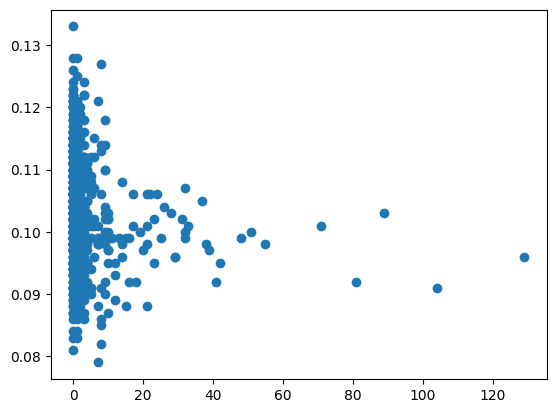

In [ ]:
x = p1asthma["Value_x"]
y = p1asthma["Value_y"]
plt.scatter(x,y)

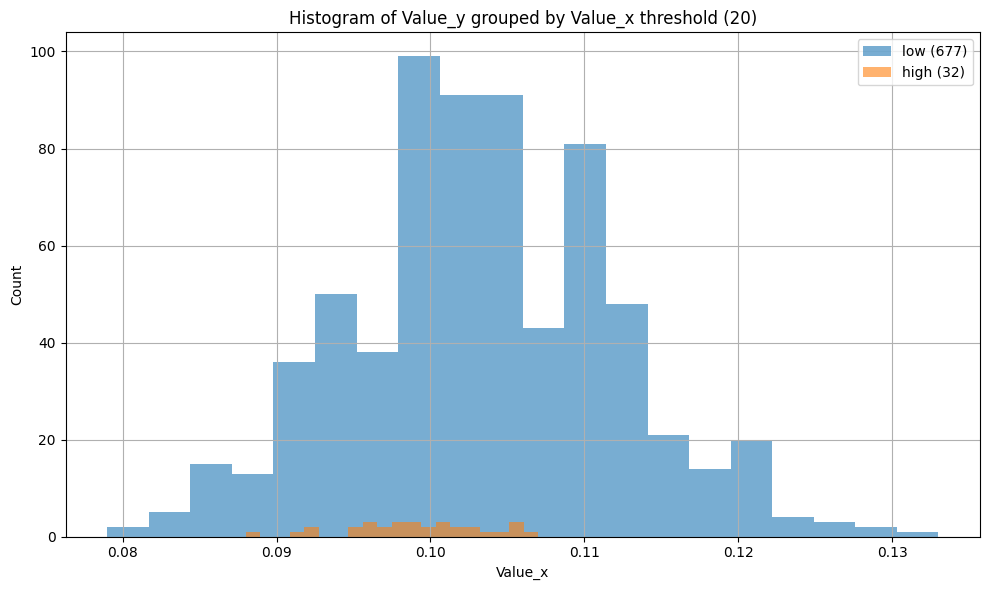

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Create 'class' column based on Value_x threshold
p1asthma['class'] = p1asthma['Value_x'].apply(lambda x: 'high' if x >= 20 else 'low')

# Step 2: Plot histograms of Value_y for each class
plt.figure(figsize=(10, 6))

for cls in ['low', 'high']:
    subset = p1asthma[p1asthma['class'] == cls]
    plt.hist(subset['Value_y'], bins=20, alpha=0.6, label=f'{cls} ({len(subset)})')

plt.xlabel('Value_x')
plt.ylabel('Count')
plt.title('Histogram of Value_y grouped by Value_x threshold (20)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


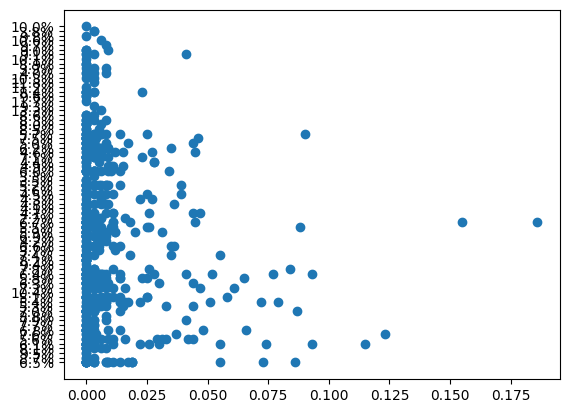

In [ ]:
p1copd = pd.merge(df_p1, df_c, on=['State', 'CountyFIPS', 'County'])

x = p1copd["Value_x"]
y = p1copd["Value_y"]
plt.scatter(x,y)

In [ ]:
#class imbalance

In [ ]:
df_p['CountyFIPS'] = df_p['County FIPS Code'].fillna(-1).astype(int)


In [ ]:
p = pd.merge(df_p, df_a, on=['CountyFIPS'])

In [ ]:
p

,State_x,County_x,County FIPS Code,2010 Population,CO 8-hr (ppm),Pb 3-mo (µg/m3),NO2 AM (ppb),NO2 1-hr (ppb),O3 8-hr (ppm),PM10 24-hr (µg/m3),PM2.5 Wtd AM (µg/m3),PM2.5 24-hr (µg/m3),SO2 1-hr (ppb),CountyFIPS,State_y,County_y,Value
0,Alabama,Baldwin County,1003.0,182265.0,ND,ND,ND,ND,0.065,ND,7.6,18,ND,1003,Alabama,Baldwin,0.099
1,Alabama,Clay County,1027.0,13932.0,ND,ND,ND,ND,ND,ND,IN,IN,ND,1027,Alabama,Clay,0.108
2,Alabama,Colbert County,1033.0,54428.0,ND,ND,ND,ND,ND,ND,IN,IN,ND,1033,Alabama,Colbert,0.104
3,Alabama,DeKalb County,1049.0,71109.0,ND,ND,ND,ND,0.066,ND,8.9,21,ND,1049,Alabama,DeKalb,0.108
4,Alabama,Elmore County,1051.0,79303.0,ND,ND,ND,ND,0.061,ND,ND,ND,ND,1051,Alabama,Elmore,0.102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,Wyoming,Sublette County,56035.0,10247.0,ND,ND,2,17,0.072,27,3.4,9,ND,56035,Wyoming,Sublette,0.091
1086,Wyoming,Sweetwater County,56037.0,43806.0,ND,ND,3,13,0.076,106,3.7,11,15,56037,Wyoming,Sweetwater,0.095
1087,Wyoming,Teton County,56039.0,21294.0,0,ND,1,IN,0.06,50,2.8,10,ND,56039,Wyoming,Teton,0.087
1088,Wyoming,Uinta County,56041.0,21118.0,ND,ND,ND,ND,ND,35,ND,ND,ND,56041,Wyoming,Uinta,0.095


In [ ]:
# Remove '%' and convert to numeric, coerce errors (like 'ND') to NaN
p["NO2         AM (ppb)"] = pd.to_numeric(p["NO2         AM (ppb)"].str.replace('%', '', regex=False), errors='coerce')


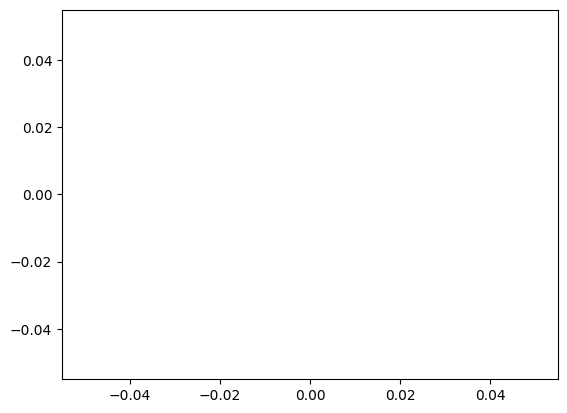

In [ ]:
x = p["NO2         AM (ppb)"]
y = p["Value"]

plt.scatter(x,y)

In [ ]:
type(p["CO          8-hr (ppm)"][3])

str

In [ ]:
p["CO          8-hr (ppm)"][3]

'ND'

In [ ]:
p.columns

Index(['State_x', 'County_x', 'County FIPS Code', '2010 Population',
       'CO          8-hr (ppm)', 'Pb           3-mo (µg/m3)',
       'NO2         AM (ppb)', 'NO2          1-hr (ppb)',
       'O3            8-hr (ppm)', 'PM10        24-hr (µg/m3) ',
       'PM2.5     Wtd AM (µg/m3) ', 'PM2.5     24-hr (µg/m3) ',
       'SO2         1-hr (ppb)', 'CountyFIPS', 'State_y', 'County_y', 'Value'],
      dtype='object')